In [1]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt

- Link to dataset: https://github.com/WING-NUS/JD2Skills-BERT-XMLC/tree/main/data

In [2]:
import json
path = "mycareerfuture-job-postings/mycareersfuture.json"

with open(path, 'r') as data_json:
    f = json.load(data_json)
    job_records = f['jobs']
    
data_df = pd.DataFrame.from_dict(job_records)
print("data dimensions:", data_df.shape)

data dimensions: (20298, 16)


 - There are 20298 rows & 16 columns in the dataset.

In [3]:
print("column names:")
print(data_df.columns)

column names:
Index(['company_name', 'job_title', 'employment_type', 'seniority',
       'job_category', 'location', 'salary', 'min_experience',
       'skills_required', 'requirements_and_role', 'job_requirements',
       'company_info', 'posting_date', 'expiry_date', 'no_of_applications',
       'job_id'],
      dtype='object')


In [4]:
data_df.head()

,company_name,job_title,employment_type,seniority,job_category,location,salary,min_experience,skills_required,requirements_and_role,job_requirements,company_info,posting_date,expiry_date,no_of_applications,job_id
0,THE SUPREME HR ADVISORY PTE. LTD.,Admin Assistant [$1.5k-$2.2k / Bukit Batuk ...,"Permanent, Full Time",Junior Executive,"[Admin , Secretarial]","AZ @ PAYA LEBAR, 140 PAYA LEBAR ROAD 409015","$1,800to$2,200Monthly",1 year exp,"[Access, Customer Service, Data Entry, Employe...",providing support director admin manager assis...,requirements preferably least 1 year relevant exp,THE SUPREME HR ADVISORY PTE. LTD.\nHere at The...,09 May 2019,08 Jun 2019,7,JOB-2019-0098255
1,GOOGLE ASIA PACIFIC PTE. LTD.,"Visual Designer, Google Pay - Singapore",Full Time,Executive,[Design],"MARINA BAY FINANCIAL CENTRE, 8 MARINA BOULEVAR...","$6,700to$13,400Monthly",5 years exp,"[Adobe Creative Suite, Advertising, Art Direct...",company overview google conventional company i...,requirementsminimum qualifications ba bs degre...,GOOGLE ASIA PACIFIC PTE. LTD.\n,09 May 2019,08 Jun 2019,43,JOB-2019-0098355
2,BBDO SINGAPORE PTE LTD,IT Manager,"Permanent, Full Time","Manager, Professional",[Information Technology],"SINGAPORE LAND TOWER, 50 RAFFLES PLACE 048623","$5,000to$7,000Monthly",5 years exp,"[Active Directory, Business Analysis, Change M...",manager manager job involves vast array duties...,requirements 5 years management experience mul...,BBDO's mantra is “The Work. The Work. The W...,09 May 2019,08 Jun 2019,37,JOB-2019-0098419
3,AMARIS CONSULTING PTE. LTD.,Active Directory Consultant,"Permanent, Full Time",Non-executive,[Information Technology],"ROBINSON 112, 112 ROBINSON ROAD 068902","$5,000to$7,000Monthly",4 years exp,"[Analysis, Business Analysis, Business Develop...",undertaking various active directory projects ...,requirements university degree computer scienc...,AMARIS CONSULTING PTE. LTD.,08 May 2019,07 Jun 2019,0,JOB-2019-0097764
4,HITACHI CONSULTING SINGAPORE PTE. LTD.,Senior Consultant (SAP HCM),Permanent,Senior Executive,[Information Technology],"PLAZA 8 @ CBP, 1 CHANGI BUSINESS PARK CRESCENT...","$6,000to$9,000Monthly",8 years exp,"[Analysis, Business Analysis, Business Develop...",provide l2 support sap hcm related issues trou...,requirementsmust skills possess degree equival...,No information added.,08 May 2019,07 Jun 2019,3,JOB-2019-0098085


In [5]:
data_df.isna().sum()

company_name             0
job_title                0
employment_type          0
seniority                0
job_category             0
location                 0
salary                   0
min_experience           0
skills_required          0
requirements_and_role    0
job_requirements         0
company_info             0
posting_date             0
expiry_date              0
no_of_applications       0
job_id                   0
dtype: int64

In [6]:
data_df['skill_count'] = data_df['skills_required'].apply(len)
print("average skills per each job: ", data_df['skill_count'].mean())

average skills per each job:  19.999310276874567


<Axes: >

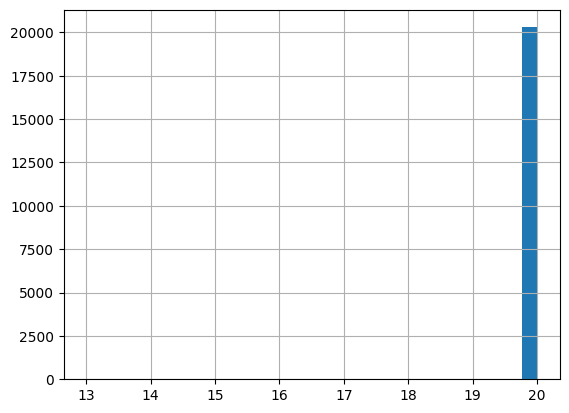

In [7]:
data_df['skill_count'].hist(bins=30)

- Most jobs have skill counts around 20. The distribution is skewed towards left.

In [8]:
all_skills = data_df['skills_required'].values.tolist()

unique_skills = set()
skill_counts = {}

for sk_list in all_skills:
    for sk in sk_list:
        unique_skills.add(sk)
        skill_counts[sk] = skill_counts.get(sk, 0) + 1
        
print("unique skills:", len(unique_skills))

unique skills: 2548


In [9]:
skill_names, counts = zip(*sorted(skill_counts.items(), key=lambda x: x[1]))
len(skill_names), len(counts)

(2548, 2548)

In [10]:
skill_names[-10:], counts[-10:]

(('Business Development',
  'Strategy',
  'Sales',
  'Strategic Planning',
  'Marketing',
  'Customer Service',
  'Microsoft Office',
  'Leadership',
  'Project Management',
  'Management'),
 (4997, 5196, 5536, 5730, 6186, 7124, 8346, 9451, 9624, 12914))

Text(0.5, 1.0, 'Top Skills Mentioned in job postings')

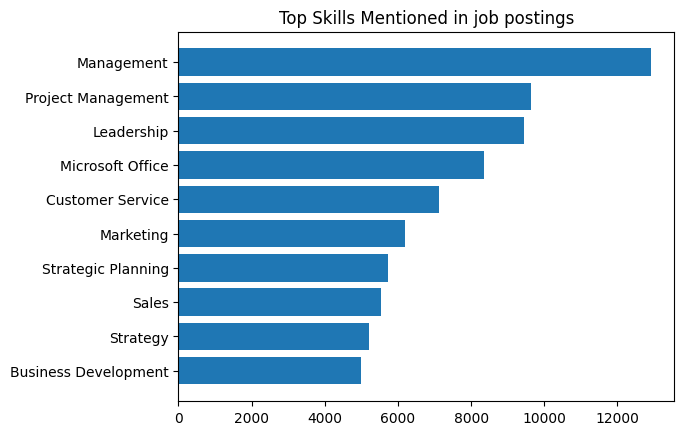

In [11]:
plt.barh(skill_names[-10:], counts[-10:])
plt.title("Top Skills Mentioned in job postings")